In [1]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/Raum27/mc/main/advertising.csv"
df = pd.read_csv(url)

In [2]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df[:][:200]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

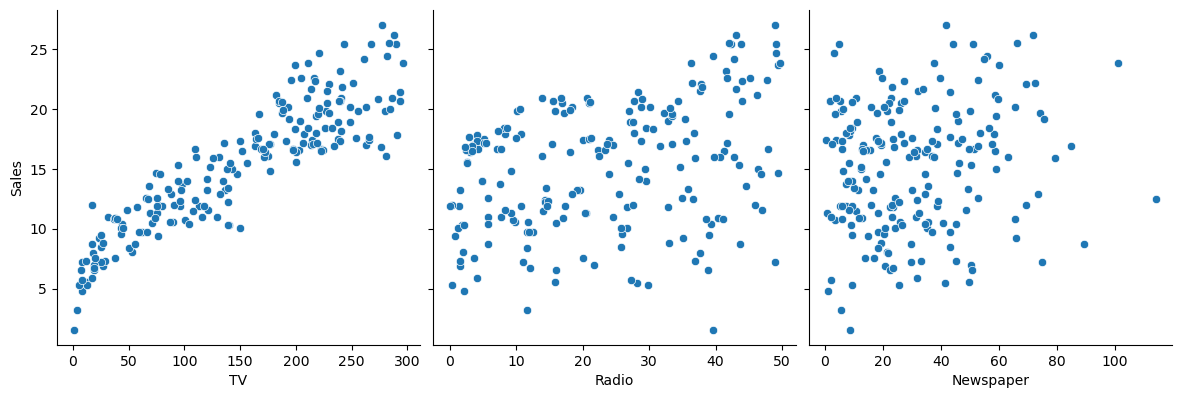

In [6]:
import seaborn as sns
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=4)

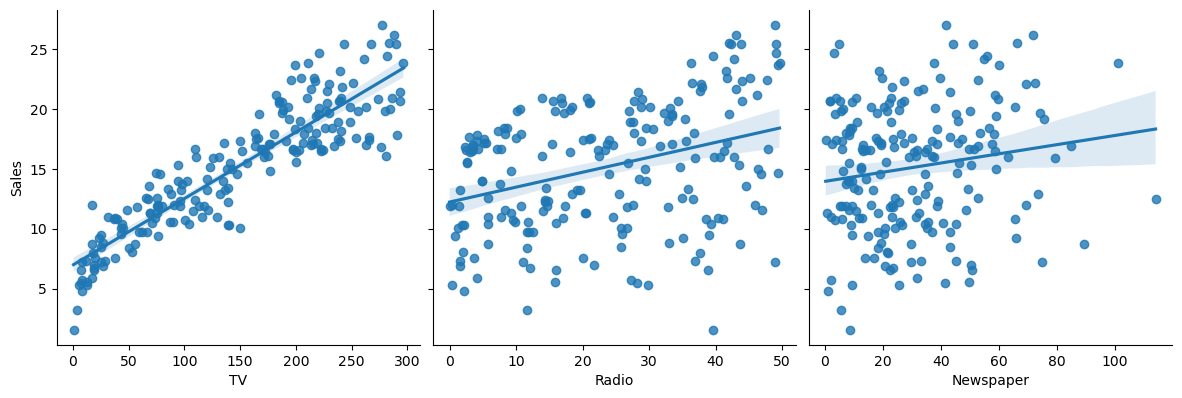

In [7]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=4 , kind='reg')

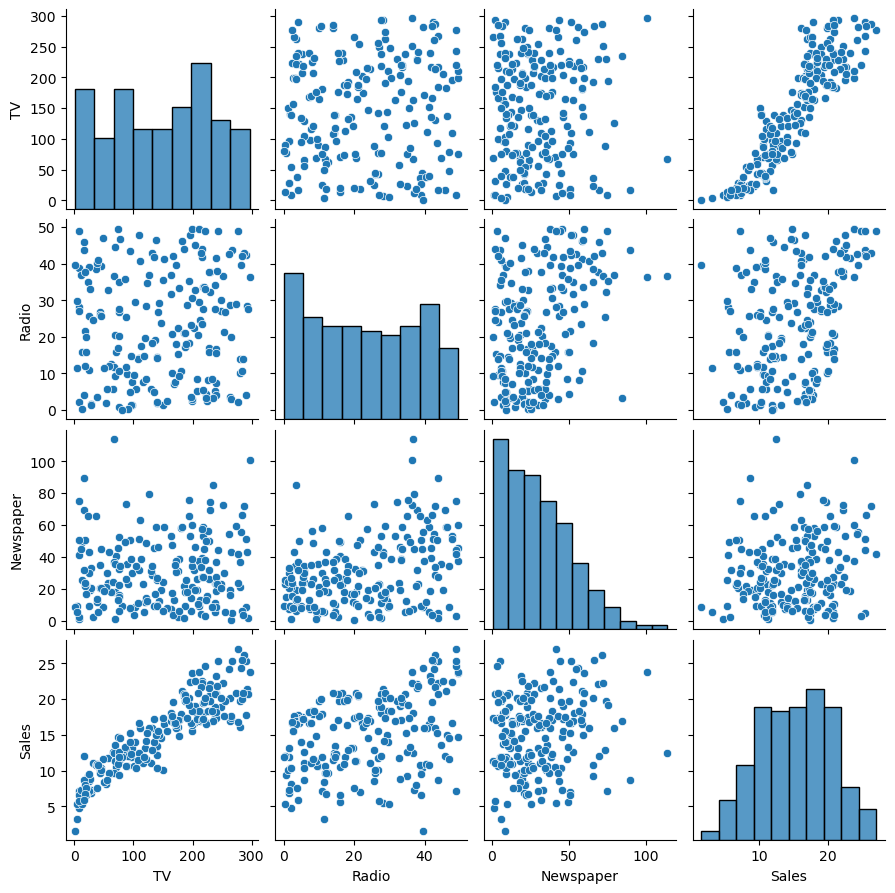

In [8]:
g = sns.pairplot(df)
g.fig.set_size_inches(9,9)

In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [10]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()

In [11]:
cols = ['TV','Radio','Newspaper']
x = df[cols]
y = df.Sales

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
model = LinearRegression.fit(X_train, y_train)

In [13]:
y_hat =model.predict(X_test)

In [14]:
print(y_hat)

[ 9.72732531 12.77059324 16.96385275 15.86646926  9.20978878 11.61991703
 19.23614042  9.40535239 13.96379558 15.7183655  10.57498474 12.53479816
  9.71948482  8.81895268 15.13220678 16.68069892 20.84971394 18.79149389
 16.87292473 24.96969331 16.30740162 17.29844568 23.46229772  8.67915105
 11.19996197 21.96324664 21.13655065 11.17081659 23.82578358 13.62613054
 14.37417475 14.61567432 18.85499683 19.24184056  7.86700159 21.58843057
 18.18070489  9.61522228 11.0729941  17.07848527 19.54028237 10.06667672
 18.78579294 18.14753204 14.13811084 16.31494884  6.09903311 13.6185415
 17.10992943  9.3868334  21.05997316  6.92254574 12.20617744 20.06948718
 10.78545395 14.41136828 12.14502986  7.69216606 17.97211106  8.64204643]


In [15]:
print(model.coef_)
print(model.intercept_)

[0.05478211 0.10976643 0.00128847]
4.390227558439044


In [16]:
list(zip(cols,model.coef_))

[('TV', 0.0547821059714123),
 ('Radio', 0.10976642885603151),
 ('Newspaper', 0.0012884709795846214)]

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#### Y = (0.0548TV) + (0.1035Radio) + (0.0047Newspaper) + 4.4075

In [18]:
model.score(x,y)

0.9021522559632627

ค่า R sqr 2 score

In [19]:
mean_squared_error(y_test,y_hat) #MSEค่ายิ่งน้อยเเสดงว่าค่าคาดเคลื่อนน้อย 

2.005432612461115

In [20]:
mean_absolute_error(y_test,y_hat)#MAE

1.1070555266086162

In [21]:
r2_score(y_test,y_hat)

0.9115698862444648